In [1]:
import tensorflow as tf
import numpy as np
%matplotlib inline
from matplotlib.colors import ListedColormap
from matplotlib import pyplot as plt

# TensorFlow Feed-Forward Neural Network 

This notebook goes through the training process for a specific neural network architecture (no explicit abstraction into layers) in very low-level, layer-by-layer detail.

## Model

The first step is to define the model we wish to use for prediction.

### Input Layer

- Input shape: $2 \times 20$. 
- Output shape: $2 \times 20$.

Define tensors.

In [2]:
X = tf.placeholder(tf.float32, shape=(2, None), name='X')

### Linear Layer 1

- Input shape: $2 \times 20$
- Output shape: $10 \times 20$

Define tensors.

In [3]:
W0_1 = tf.get_variable('W0_1', shape=(10, 1), initializer=tf.zeros_initializer)
W_1 = tf.get_variable('W_1', shape=(2, 10), initializer=tf.random_normal_initializer(0.0, tf.sqrt(1 / 2)))

Instructions for updating:
Colocations handled automatically by placer.


### ReLU Activation Layer 1

- Input shape: $10 \times 20$
- Output shape: $10 \times 20$

No variables need to be defined.

### Linear Layer 2

- Input shape: $10 \times 20$
- Output shape: $10 \times 20$

Define tensors.

In [4]:
W0_2 = tf.get_variable('W0_2', shape=(10, 1), initializer=tf.zeros_initializer)
W_2 = tf.get_variable('W_2', shape=(10, 10), initializer=tf.random_normal_initializer(0.0, tf.sqrt(1 / 10)))

### ReLU Activation Layer 2

- Input shape: $10 \times 20$
- Output shape: $10 \times 20$

No variables need to be defined.

### Linear Layer 3

- Input shape: $10 \times 20 $
- Output shape: $2 \times 20 $

Define tensors.

In [5]:
W0_3 = tf.get_variable('W0_3', shape=(2, 1), initializer=tf.zeros_initializer)
W_3 = tf.get_variable('W_3', shape=(10, 2), initializer=tf.random_normal_initializer(0.0, tf.sqrt(1 / 10)))

### Softmax Activation Layer

- Input shape: $2 \times 20$
- Output shape: $2 \times 20$

No variables need to be defined.

## Forward Pass

Now we have the individual nodes of a neural network graph, but they aren't connected in a way to do anything useful. Let's connect them to run the forward pass to get ready for prediction.

### Input Layer

- Input shape: $ 2 \times 20 $
- Output shape: $ 2\times 20 $

Define forward result $A^{(0)}$ from placeholder values.

In [6]:
A_0 = X

### Linear Layer 1

- Input shape: $2 \times 20$
- Output shape: $10 \times 20$

Define forward pre-activation result $Z^{(1)}$ from previous activation $A^{(0)}$.

In [7]:
Z_1 = tf.add(tf.matmul(tf.transpose(W_1), A_0), W0_1)

### ReLU Activation Layer 1

- Input shape: $10 \times 20$
- Output shape: $10 \times 20$

Define forward activation result $A^{(1)}$ from previous pre-activation $Z^{(1)}$.

In [8]:
A_1 = tf.maximum(tf.constant(0.0), Z_1)

### Linear Layer 2

- Input shape: $10 \times 20$
- Output shape: $10 \times 20$

Define forward pre-activation result $Z^{(2)}$ from previous activation $A^{(1)}$.

In [9]:
Z_2 = tf.add(tf.matmul(tf.transpose(W_2), A_1), W0_2)

### ReLU Activation Layer 2

- Input shape: $10 \times 20$
- Output shape: $10 \times 20$

Define forward activation result $A^{(2)}$ from previous pre-activation $Z^{(2)}$.

In [10]:
A_2 = tf.maximum(tf.constant(0.0), Z_2)

### Linear Layer 3

- Input shape: $10 \times 20 $
- Output shape: $2 \times 20 $

Define forward pre-activation result $Z^{(3)}$ from previous activation $A^{(2)}$.

In [11]:
Z_3 = tf.add(tf.matmul(tf.transpose(W_3), A_2), W0_3)

### Softmax Activation Layer

- Input shape: $2 \times 20$
- Output shape: $2 \times 20$

Define forward activation result $A^{(3)}$ from previous pre-activation $Z^{(3)}$.

In [12]:
A_3 = tf.add(1.e-8, tf.divide(tf.exp(tf.subtract(Z_3, tf.reduce_max(Z_3))), tf.reduce_sum(tf.exp(tf.subtract(Z_3, tf.reduce_max(Z_3))), axis=0, keepdims=True)))

Note: The end result of the forward pass will be stored in $A^{(3)}$ as it is the last activation result computed.

## Prediction

The graph has now been constructed to provide the forward pass result. Using some data, we can observe this prediction.

### Data

I am going to use the standard 'hard' data classification data set. (I only use NumPy arrays here because tensors cannot be iterated over without eager execution enable, which I do not want to introduce in this notebook.)

In [13]:
X_train = np.array([[-0.23390341,  1.18151883, -2.46493986,  1.55322202,  1.27621763,
                      2.39710997, -1.34403040, -0.46903436, -0.64673502, -1.44029872,
                     -1.37537243,  1.05994811, -0.93311512,  1.02735575, -0.84138778,
                     -2.22585412, -0.42591102,  1.03561105,  0.91125595, -2.26550369],
                    [-0.92254932, -1.10309630, -2.41956036, -1.15509002, -1.04805327,
                      0.08717325,  0.81847250, -0.75171045,  0.60664705,  0.80410947,
                     -0.11600488,  1.03747218, -0.67210575,  0.99944446, -0.65559838,
                     -0.40744784, -0.58367642,  1.05972780, -0.95991874, -1.41720255]])

Y_train = np.array([[0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1.],
                    [1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0.]])

Let's start by taking a look at our data.

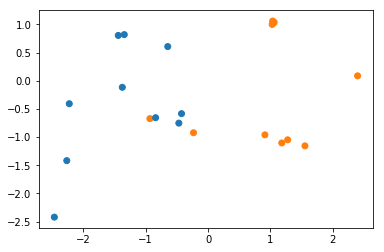

In [14]:
_ = plt.scatter(X_train[0,:], X_train[1,:], c=Y_train[1,:], 
                cmap=ListedColormap(['#1f77b4', '#ff7f0e']))

### Execution

Now that we have some data, we can feed it through the network using the placeholders and forward pass (whose result is contained in `A`).

In [15]:
with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    
    A_3_eval = sess.run(A_3, feed_dict={ X: X_train })

Let's take a look at the evaluated output.

In [16]:
A_3_eval

array([[0.51039696, 0.44517606, 0.44778383, 0.42976457, 0.44161725,
        0.40682817, 0.43670836, 0.49664384, 0.49189892, 0.42790374,
        0.4429809 , 0.50107396, 0.47464508, 0.50077873, 0.47825727,
        0.41319707, 0.49470595, 0.5030216 , 0.45703822, 0.43390357],
       [0.48960307, 0.55482394, 0.5522162 , 0.57023543, 0.55838275,
        0.59317183, 0.56329167, 0.5033562 , 0.5081011 , 0.5720963 ,
        0.5570192 , 0.49892607, 0.5253549 , 0.4992213 , 0.5217427 ,
        0.5868029 , 0.5052941 , 0.4969784 , 0.54296184, 0.5660964 ]],
      dtype=float32)

## Metrics

Next step for training is to evaluate the loss and accuracy of the prediction with respect to the actual values.

### Input

In the graph environment, we need a placeholder for the actual labels.

- Input shape: $2 \times 20$
- Output shape: $2 \times 20$

Define tensors.

In [17]:
Y = tf.placeholder(tf.float32, shape=(2, None), name='Y')

### Negative Log-Likelihood Multi-Class Loss

- Input shape: $2 \times 20$
- Output shape: Scalar

Define loss result `L` in terms of placeholder `Y` and predictions `A`.

In [18]:
L = tf.negative(tf.reduce_sum(tf.multiply(Y, tf.log(A_3))))

### Accuracy

- Input shape: $2 \times 20$
- Output shape: Scalar

Define accuracy `accuracy` in terms of placeholder `Y` and predictions `A`.

In [19]:
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(Y, axis=0), tf.argmax(A_3, axis=0)), tf.float32))

### Execution

Now that we have our loss defined in our graph, we can feed the actual labels and get a loss value.

In [20]:
with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    
    L_eval, accuracy_eval = sess.run([L, accuracy], feed_dict={ X: X_train, Y: Y_train })

Let's take a look at the evaluated loss.

In [21]:
L_eval, accuracy_eval

(11.109297, 0.75)

## Backward Pass

Now we have our prediction and the loss of that prediction, we can compute the gradient of the loss with respect to every `A`, `Z`, and weight matrix.

### Negative Log-Likelihood Multi-Class Loss

- Input shape: $2 \times 20$
- Output shape: $2 \times 20$

Define gradient of loss with respect to activations $\partial L / \partial A^{(3)}$.

In [22]:
dLdA_3 = -Y / A_3

### Softmax Activation Layer

- Input shape: $2 \times 20$
- Output shape: $2 \times 20$

First, we calculate the gradient of softmax outputs with respect to softmax inputs $\partial A^{(3)} / \partial Z^{(3)}$.

In [23]:
dA_3dZ_3 = tf.einsum('jk,jk,ji->ijk', A_3, tf.subtract(tf.constant(1.0), A_3), tf.eye(2)) \
         + tf.einsum('jk,ik,ji->ijk', tf.negative(A_3), A_3, tf.subtract(tf.constant(1.0), tf.eye(2)))

Then, we can multiply this result with $\partial L / \partial A^{(3)}$ to get $\partial L / \partial Z^{(3)}$.

In [24]:
dLdZ_3 = tf.einsum('ikj,kj->ij', dA_3dZ_3, dLdA_3)

### Linear Layer 3

- Input shape: $2 \times 20$
- Output shape: $ 10 \times 20$

First, we construct the gradients of the loss with respect to the weight matrices $\partial L / \partial W^{(3)}$ and $ \partial L / \partial W_0^{(3)} $ using the previous $\partial L / \partial Z^{(3)}$.

In [25]:
dLdW_3 = tf.matmul(A_2, tf.transpose(dLdZ_3))
dLdW0_3 = tf.reduce_sum(dLdZ_3, axis=1, keepdims=True)

Now, we can also compute the loss with respect to the layer activations $\partial L / \partial A^{(2)}$ using $\partial L / \partial Z^{(3)}$.

In [26]:
dLdA_2 = tf.matmul(W_3, dLdZ_3)

### ReLU Activation Layer 2

- Input shape: $10 \times 20$
- Output shape: $10 \times 20$

Compute the gradient of loss with respect to layer pre-activations $\partial L / \partial Z^{(2)} $ using $\partial L / \partial A^{(2)}$.

In [27]:
dLdZ_2 = tf.multiply(tf.sign(A_2), dLdA_2)

### Linear Layer 2

- Input shape: $10 \times 20$
- Output shape: $10 \times 20$

First, we construct the gradients of the loss with respect to the weight matrices $\partial L / \partial W^{(2)}$ and $ \partial L / \partial W_0^{(2)} $ using the previous $\partial L / \partial Z^{(2)}$.

In [28]:
dLdW_2 = tf.matmul(A_1, tf.transpose(dLdZ_2))
dLdW0_2 = tf.reduce_sum(dLdZ_2, axis=1, keepdims=True)

Now, we can also compute the loss with respect to the layer activations $\partial L / \partial A^{(1)}$ using $\partial L / \partial Z^{(2)}$.

In [29]:
dLdA_1 = tf.matmul(W_2, dLdZ_2)

### ReLU Activation Layer 1

- Input shape: $10 \times 20$
- Output shape: $10 \times 20$

Compute the gradient of loss with respect to layer pre-activations $\partial L / \partial Z^{(1)} $ using $\partial L / \partial A^{(1)}$.

In [30]:
dLdZ_1 = tf.multiply(tf.sign(A_1), dLdA_1)

### Linear Layer 1

- Input shape: $10 \times 20$
- Output shape: $2 \times 20$

First, we construct the gradients of the loss with respect to the weight matrices $\partial L / \partial W^{(1)}$ and $ \partial L / \partial W_0^{(1)} $ using the previous $\partial L / \partial Z^{(1)}$.

In [31]:
dLdW_1 = tf.matmul(A_0, tf.transpose(dLdZ_1))
dLdW0_1 = tf.reduce_sum(dLdZ_1, axis=1, keepdims=True)

Now, we can also compute the loss with respect to the layer activations $\partial L / \partial A^{(0)}$ using $\partial L / \partial Z^{(1)}$.

In [32]:
dLdA_0 = tf.matmul(W_1, dLdZ_1)

This last gradient isn't really important and neither is $\partial L / \partial Z^{(0)}$ especially (why we don't continue calculating gradients once more into the input layer). But, to keep the calculation uniform, we include it (in the layer abstraction, this will be computed no matter what).

## Parameter Update

Now that we have all the necessary gradients, we can update the model parameters.

### Input Layer

- Input shape: $ 2 \times 20 $
- Output shape: $ 2\times 20 $

There are no parameters to update.

### Linear Layer 1

- Input shape: $2 \times 20$
- Output shape: $10 \times 20$

We update both the $W^{(1)}$ and $W_0^{(1)}$ matrices.

In [33]:
W_1 = W_1.assign(tf.subtract(W_1, tf.scalar_mul(0.005, dLdW_1)))
W0_1 = W0_1.assign(tf.subtract(W0_1, tf.scalar_mul(0.005, dLdW0_1)))

### ReLU Activation Layer 1

- Input shape: $10 \times 20$
- Output shape: $10 \times 20$

There are no parameters to update.

### Linear Layer 2

- Input shape: $10 \times 20$
- Output shape: $10 \times 20$

We update both the $W^{(2)}$ and $W_0^{(2)}$ matrices.

In [34]:
W_2 = W_2.assign(tf.subtract(W_2, tf.scalar_mul(0.005, dLdW_2)))
W0_2 = W0_2.assign(tf.subtract(W0_2, tf.scalar_mul(0.005, dLdW0_2)))

### ReLU Activation Layer 2

- Input shape: $10 \times 20$
- Output shape: $10 \times 20$

There are no parameters to update.

### Linear Layer 3

- Input shape: $10 \times 20$
- Output shape: $2 \times 20$

We update both the $W^{(3)}$ and $W_0^{(3)}$ matrices.

In [35]:
W_3 = W_3.assign(tf.subtract(W_3, tf.scalar_mul(0.005, dLdW_3)))
W0_3 = W0_3.assign(tf.subtract(W0_3, tf.scalar_mul(0.005, dLdW0_3)))

### Softmax Activation Layer

- Input shape: $2 \times 20$
- Output shape: $2 \times 20$

There are no parameters to update.

### Groups

To make it easier to call this train process, we use a `tf.group`.

In [36]:
train = tf.group(W_3, W0_3, W_2, W0_2, W_1, W0_1)

### Execution

Now we can finally run the back-propogation and update the weight matrices.

In [37]:
with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    
    L_eval_before = sess.run(L, feed_dict={ X: X_train, Y: Y_train })
    
    sess.run(train, feed_dict={ X: X_train, Y: Y_train })
    
    L_eval_after = sess.run(L, feed_dict={ X: X_train, Y: Y_train })

Let's just make sure the loss went down after a single training update step.

In [38]:
L_eval_before, L_eval_after

(14.414701, 13.77519)

Be sure to note that `L_eval` from way before, is **not** equal to `L_eval_before`. Shouldn't they be because we haven't performed any updates to the model since then? Wrong! Every time we create a `Session`, we create a new instance of our model with newly initialized variables.

## Train

We have all of the components of a model and how to train it. However, this only updates the model once. Let's put everything together and yield a fully trained model.

### Saving

Before we train, we need a way to save the model outside of a session after training it. For this, we use `tf.train.Saver`. We add it to our graph.

In [39]:
saver = tf.train.Saver()

### Training Loop

Now we can define a loop to train our model for many iterations and print the progress.

In [40]:
with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    
    for it in range(100000):
        
        t = np.random.randint(20)
        
        L_eval, _ = sess.run([L, train], feed_dict={ X: X_train[:, t:t+1], Y: Y_train[:, t:t+1] })
        
        if it % 250 == 1:
            accuracy_eval = sess.run(accuracy, feed_dict={ X: X_train, Y: Y_train })
            print('Iteration =', it, '\tAcc =', accuracy_eval, '\tLoss =', L_eval, flush=True)
            
    saver.save(sess, 'model.ckpt')

Iteration = 1 	Acc = 0.5 	Loss = 0.33144736
Iteration = 251 	Acc = 0.9 	Loss = 0.1399084
Iteration = 501 	Acc = 0.9 	Loss = 0.046266172
Iteration = 751 	Acc = 0.9 	Loss = 0.05729477
Iteration = 1001 	Acc = 0.9 	Loss = 0.0072332523
Iteration = 1251 	Acc = 0.9 	Loss = 0.031392578
Iteration = 1501 	Acc = 0.9 	Loss = 0.26341286
Iteration = 1751 	Acc = 0.9 	Loss = 0.18637268
Iteration = 2001 	Acc = 0.9 	Loss = 0.14317924
Iteration = 2251 	Acc = 0.9 	Loss = 0.017697142
Iteration = 2501 	Acc = 0.9 	Loss = 0.00021764023
Iteration = 2751 	Acc = 0.9 	Loss = 2.384186e-07
Iteration = 3001 	Acc = 0.9 	Loss = 0.091489375
Iteration = 3251 	Acc = 0.9 	Loss = 0.1434987
Iteration = 3501 	Acc = 0.9 	Loss = 0.26605272
Iteration = 3751 	Acc = 0.9 	Loss = 0.1918988
Iteration = 4001 	Acc = 0.9 	Loss = 0.0062921895
Iteration = 4251 	Acc = 0.9 	Loss = 0.2294501
Iteration = 4501 	Acc = 0.9 	Loss = -0.0
Iteration = 4751 	Acc = 0.9 	Loss = 0.10790021
Iteration = 5001 	Acc = 0.95 	Loss = 1.1920929e-07
Iteration = 

Iteration = 42251 	Acc = 1.0 	Loss = 0.024496006
Iteration = 42501 	Acc = 1.0 	Loss = 9.0603164e-05
Iteration = 42751 	Acc = 1.0 	Loss = 1.1920929e-07
Iteration = 43001 	Acc = 1.0 	Loss = -0.0
Iteration = 43251 	Acc = 1.0 	Loss = 1.1920929e-07
Iteration = 43501 	Acc = 1.0 	Loss = 0.01787049
Iteration = 43751 	Acc = 1.0 	Loss = 0.34400132
Iteration = 44001 	Acc = 1.0 	Loss = 0.0065154633
Iteration = 44251 	Acc = 1.0 	Loss = 0.0075605693
Iteration = 44501 	Acc = 1.0 	Loss = -0.0
Iteration = 44751 	Acc = 0.95 	Loss = 0.023325672
Iteration = 45001 	Acc = 1.0 	Loss = 6.6163346e-05
Iteration = 45251 	Acc = 0.95 	Loss = -0.0
Iteration = 45501 	Acc = 1.0 	Loss = 5.1261308e-05
Iteration = 45751 	Acc = 1.0 	Loss = -0.0
Iteration = 46001 	Acc = 1.0 	Loss = -0.0
Iteration = 46251 	Acc = 1.0 	Loss = 4.768373e-07
Iteration = 46501 	Acc = 1.0 	Loss = 0.39365408
Iteration = 46751 	Acc = 1.0 	Loss = 0.0019324007
Iteration = 47001 	Acc = 1.0 	Loss = 0.37499607
Iteration = 47251 	Acc = 1.0 	Loss = 0.0187

Iteration = 85751 	Acc = 1.0 	Loss = 8.583106e-06
Iteration = 86001 	Acc = 1.0 	Loss = 0.06845376
Iteration = 86251 	Acc = 1.0 	Loss = 0.07772739
Iteration = 86501 	Acc = 1.0 	Loss = 0.035650738
Iteration = 86751 	Acc = 1.0 	Loss = 1.1563368e-05
Iteration = 87001 	Acc = 1.0 	Loss = 0.0015192241
Iteration = 87251 	Acc = 1.0 	Loss = 0.0035409364
Iteration = 87501 	Acc = 1.0 	Loss = 2.384186e-07
Iteration = 87751 	Acc = 1.0 	Loss = 0.066625364
Iteration = 88001 	Acc = 1.0 	Loss = -0.0
Iteration = 88251 	Acc = 1.0 	Loss = -0.0
Iteration = 88501 	Acc = 1.0 	Loss = -0.0
Iteration = 88751 	Acc = 1.0 	Loss = -0.0
Iteration = 89001 	Acc = 1.0 	Loss = -0.0
Iteration = 89251 	Acc = 1.0 	Loss = 1.1920929e-07
Iteration = 89501 	Acc = 1.0 	Loss = -0.0
Iteration = 89751 	Acc = 1.0 	Loss = 1.180179e-05
Iteration = 90001 	Acc = 1.0 	Loss = 0.003531306
Iteration = 90251 	Acc = 1.0 	Loss = -0.0
Iteration = 90501 	Acc = 1.0 	Loss = 4.9115435e-05
Iteration = 90751 	Acc = 1.0 	Loss = -0.0
Iteration = 91001 

### Decision Regions

Our network successully classifies all of our points. Let's take a look at the decision regions.

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from model.ckpt


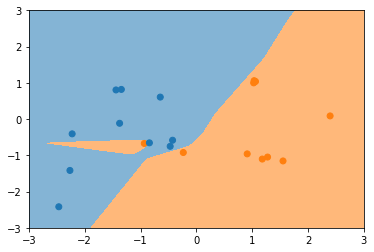

In [41]:
with tf.Session() as sess:
    
    # Restore variables
    saver.restore(sess, 'model.ckpt')
    
    # Create a grid of points to classify
    xx1, xx2 = np.meshgrid(np.arange(-3, 3, 0.005), np.arange(-3, 3, 0.005))

    # Flatten the grid to pass into model
    grid = np.c_[xx1.ravel(), xx2.ravel()].T

    # Predict classification at every point on the grid
    Z = sess.run(A_3, feed_dict={ X: grid, Y: Y_train })[1, :].reshape(xx1.shape)

    # Plot the prediction regions.
    plt.imshow(Z, interpolation='bicubic', origin='lower', extent=[-3, 3, -3, 3], 
               cmap=ListedColormap(['#1f77b4', '#ff7f0e']), alpha=0.55, aspect='auto')

    # Plot the original points.
    _ = plt.scatter(X_train[0,:], X_train[1,:], c=Y_train[1,:], cmap=ListedColormap(['#1f77b4', '#ff7f0e']))